# For each of the following steps click on the cell you want to process, then click 'Run' to see the output
# Read Data

In [1]:
import nltk
import pandas as pd
import re
import string
import matplotlib.pyplot as plt

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()
pd.set_option('display.max_colwidth', 50)

data = pd.read_csv("survey.csv", sep=',')
data.drop('Timestamp', axis=1, inplace=True)

data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 14 columns):
LEVEL              20 non-null object
ROLE               20 non-null object
STAGE              20 non-null object
ENHANCE            20 non-null object
EASE               20 non-null object
ATTITUDE           20 non-null object
CHARACTERISTICS    20 non-null object
SUPPORT            20 non-null object
EXTERNAL           20 non-null object
SIZE               20 non-null object
EXPERTISE          20 non-null object
ADVANTAGES         20 non-null object
COMPATIBLE         20 non-null object
ADDITIONAL         10 non-null object
dtypes: object(14)
memory usage: 2.3+ KB


,LEVEL,ROLE,STAGE,ENHANCE,EASE,ATTITUDE,CHARACTERISTICS,SUPPORT,EXTERNAL,SIZE,EXPERTISE,ADVANTAGES,COMPATIBLE,ADDITIONAL
0,Federal,Management / Jr Officer,Some initial discussion has occurred around th...,Cloud computing would not enhance my job.,Cloud infrastructure would not enhance my job.,"Leadership like to talk about change, but any ...",Anti innovation and lost in the past.,no support,no influence,Unknown,Unknown,Not sure we use SharePoint and have remote acc...,As mention above our work does not require acc...,NaN
1,Federal,Executive / Snr Officer,Some initial discussion has occurred around th...,Using any device log into a center service pro...,Not needing to transport personal and work equ...,The leadership likes adopting better solutions...,"Supportive, but other factors inside and outsi...",The main obstacle of a fully cloud infrastruct...,"Little, but if solutions are found in the priv...",The number of personnel required to maintain I...,We have a limited number if cloud technologist...,Reduced resource burden,"Low, due the lack of control of the infrastruc...",NaN
2,Federal,Executive / Snr Officer,No discussion has occurred,don't know enough about it,don't know,good,good,don't know,don't know,big,don't know,don't know enough about is,don't know,NaN
3,Federal,Executive / Snr Officer,Some initial discussion has occurred around th...,I'm not sure.,"Once it was implemented, it probably would. My...","Leadership likes change, policy makers do not.","Leadership likes innovation, policy makers do ...",There is a group at ADM(IM) who is looking at ...,"I'm not sure it does, unless you count the Tre...",All of my organization is allocated to the IT ...,Not high unless someone has done some studying...,I'm not sure what advantages there would be.,I'm not sure.,NaN
4,Federal,Executive / Snr Officer,Some initial discussion has occurred around th...,It has the potential to significantly enhance ...,It has the potential to significantly enhance ...,Very supportive with the caveat that it be ine...,Very supportive with the caveat that it be ine...,The concept is nascent at this time.,"In general, I do not believe it influences the...",I am not significantly aware to describe the s...,I think that our IT department would require a...,It could bring major advantages in terms of ag...,It could be very compatible but again would re...,NaN


# Cleaning
### Removing punctuation,stopwords,stemming and tokenizing text

In [2]:

def clean_text(text):
    if type(text) is float:
        return ''
    else:
        text = "".join([word.lower() for word in text if word not in string.punctuation])
        tokens = re.split('\W+', text)
        text = [wn.lemmatize(word) for word in tokens if word not in stopwords]
        return text

# Run through each column, clean the data
for k in data:   
    data[k] = data[k].apply(lambda x: clean_text(x)) 

data.head()

,LEVEL,ROLE,STAGE,ENHANCE,EASE,ATTITUDE,CHARACTERISTICS,SUPPORT,EXTERNAL,SIZE,EXPERTISE,ADVANTAGES,COMPATIBLE,ADDITIONAL
0,[federal],"[management, jr, officer]","[initial, discussion, occurred, around, possib...","[cloud, computing, would, enhance, job]","[cloud, infrastructure, would, enhance, job]","[leadership, like, talk, change, real, change,...","[anti, innovation, lost, past]",[support],[influence],[unknown],[unknown],"[sure, use, sharepoint, remote, access, requir...","[mention, work, require, access, time, device]",
1,[federal],"[executive, snr, officer]","[initial, discussion, occurred, around, possib...","[using, device, log, center, service, provider...","[needing, transport, personal, work, equipment...","[leadership, like, adopting, better, solution,...","[supportive, factor, inside, outside, organiza...","[main, obstacle, fully, cloud, infrastructure,...","[little, solution, found, private, sector, cou...","[number, personnel, required, maintain, organi...","[limited, number, cloud, technologist, priorit...","[reduced, resource, burden]","[low, due, lack, control, infrastructure, info...",
2,[federal],"[executive, snr, officer]","[discussion, occurred]","[dont, know, enough]","[dont, know]",[good],[good],"[dont, know]","[dont, know]",[big],"[dont, know]","[dont, know, enough]","[dont, know]",
3,[federal],"[executive, snr, officer]","[initial, discussion, occurred, around, possib...","[im, sure]","[implemented, probably, would, job, would, har...","[leadership, like, change, policy, maker]","[leadership, like, innovation, policy, maker]","[group, admim, looking, adopting, cloud, infra...","[im, sure, unless, count, treasury, board, pol...","[organization, allocated, department, department]","[high, unless, someone, done, studying, think,...","[im, sure, advantage, would]","[im, sure]",
4,[federal],"[executive, snr, officer]","[initial, discussion, occurred, around, possib...","[potential, significantly, enhance, job, cavea...","[potential, significantly, enhance, job, cavea...","[supportive, caveat, inexpensive, easily, impl...","[supportive, caveat, inexpensive, easily, impl...","[concept, nascent, time]","[general, believe, influence, organization]","[significantly, aware, describe, size, departm...","[think, department, would, require, massive, c...","[could, bring, major, advantage, term, agility...","[could, compatible, would, require, massive, c...",


# Frequency Distribution
### A graph is created for each of the survey questions       

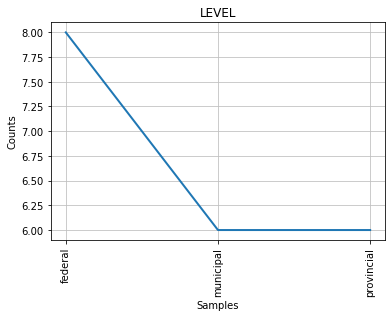

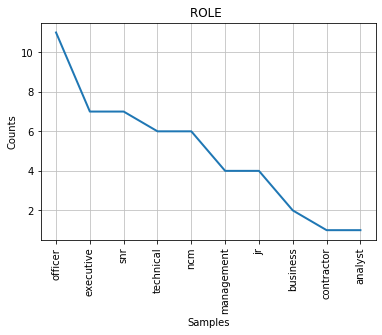

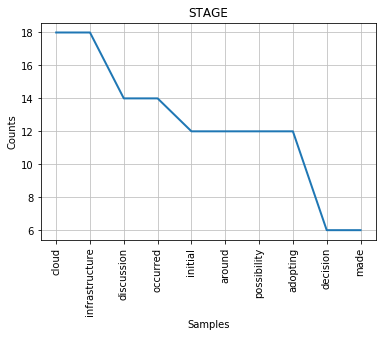

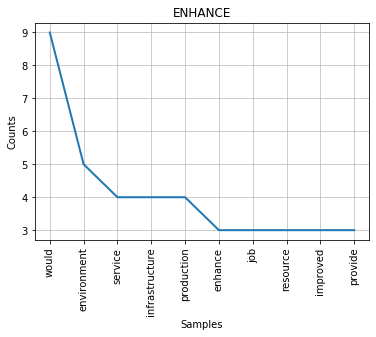

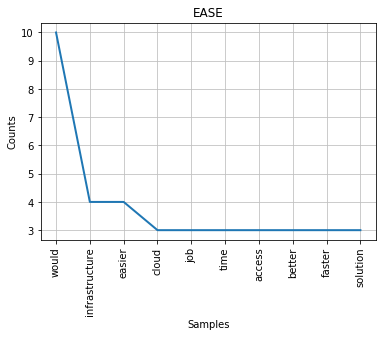

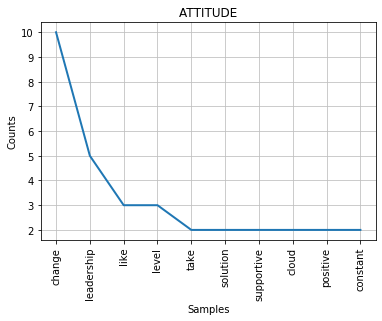

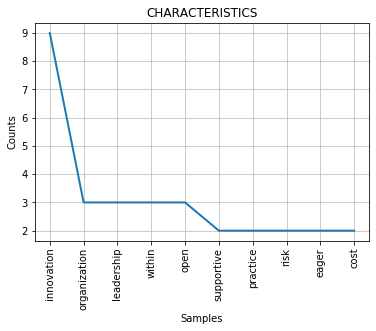

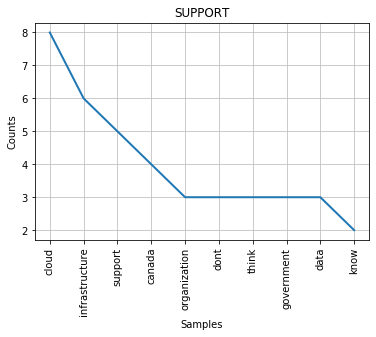

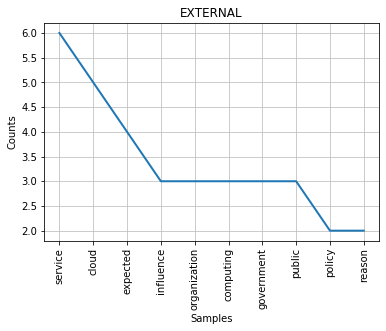

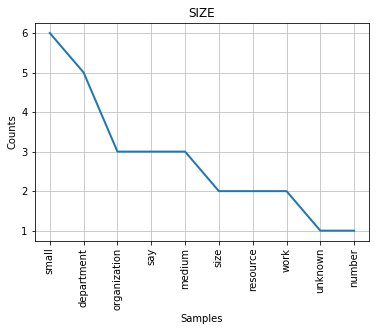

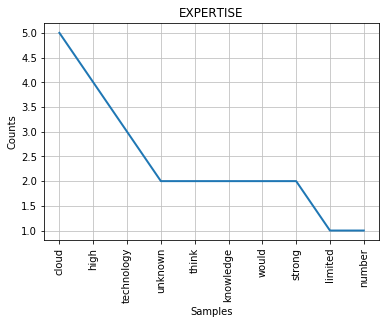

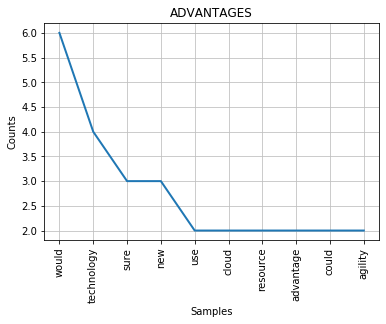

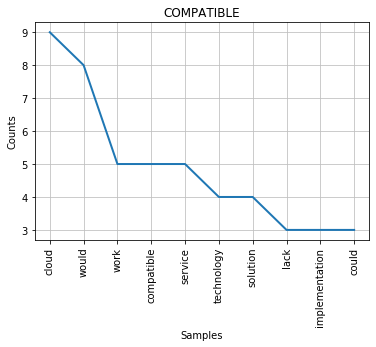

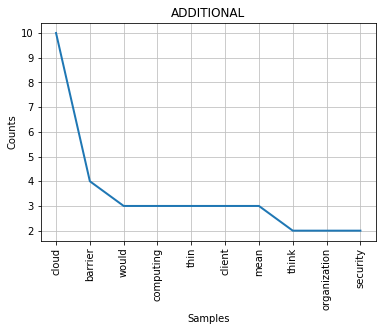

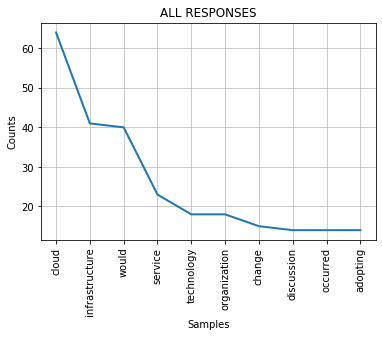

In [3]:
cumulative_list = []
for label in data.keys():
    new_list = []
    
    for answers in data[label]:
        new_list = new_list + list(answers) 
    
    cumulative_list = cumulative_list + new_list    
    fd = nltk.FreqDist(filter(None,new_list))
    fd.plot(10,cumulative=False,title=label)
    plt.show()

fd_all = nltk.FreqDist(filter(None,cumulative_list))
fd_all.plot(10,cumulative=False,title='ALL RESPONSES')
plt.show()

